In [ ]:
# env: gen_ai

from sdv.datasets.demo import download_demo

In [2]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

In [3]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


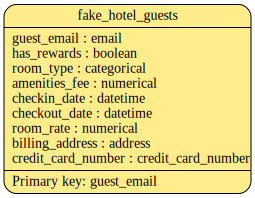

In [4]:
metadata.visualize()

In [5]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)

In [6]:
synthesizer.fit(
    data=real_data
)

In [7]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,0.29,27 Mar 2020,09 Mar 2020,135.15,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,False,DELUXE,8.15,07 Sep 2020,25 Jun 2020,183.24,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,False,BASIC,11.65,22 Mar 2020,01 Apr 2020,163.57,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788
3,humphreyjennifer@example.net,False,BASIC,48.12,04 Jun 2020,14 May 2020,127.75,"8906 Bobby Trail\nEast Sandra, NY 43986",3524946844839485
4,joshuabrown@example.net,False,DELUXE,11.07,08 Jan 2020,13 Jan 2020,180.12,"732 Dennis Lane\nPort Nicholasstad, DE 49786",4446905799576890978


In [8]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 637.54it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 233.95it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 335.42it/s]|
Column Shapes Score: 90.06%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 223.78it/s]|
Column Pair Trends Score: 89.29%

Overall Score (Average): 89.68%



In [10]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.982000
1,room_type,TVComplement,0.984000
2,amenities_fee,KSComplement,0.764778
3,checkin_date,KSComplement,0.962000
4,checkout_date,KSComplement,0.968750
5,room_rate,KSComplement,0.742000


In [11]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,michaelsanders@shaw.net,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


In [12]:
synthetic_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,dsullivan@example.net,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788


In [13]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_rate',
    metadata=metadata
)

#fig.show()
fig.show(renderers='vscode')

In [14]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['checkin_date', 'checkout_date'],
    metadata=metadata
)

fig.show()

In [15]:
synthesizer.save('my_synthesizer.pkl')

In [16]:
from sdv.utils import load_synthesizer

synthesizer = load_synthesizer('my_synthesizer.pkl')
synthesizer.sample(num_rows=3)

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,cburns@example.com,False,SUITE,NaN,14 Jun 2020,23 Jun 2020,298.22,Unit 7909 Box 7283\nDPO AA 48458,30158284644887
1,jordanpamela@example.org,False,BASIC,0.04,26 Oct 2020,09 Nov 2020,244.69,"0837 Stewart Pike Suite 951\nPort Zachary, IA ...",4375705762878737
2,amanda33@example.org,False,DELUXE,35.96,10 Apr 2020,05 Apr 2020,176.64,"24644 Pollard Burgs Apt. 192\nSarahview, PA 78396",180027361090256


# References

[website](https://sdv.dev/)

[Visualization issue](https://github.com/sdv-dev/SDMetrics/issues/528)